In [1]:
#Se importan las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#Se lee la tabla.
df0 = pd.read_csv('vid18_180219.dat', delimiter = ',')
sns.set(rc={'figure.figsize':(12,8.27)})

In [3]:
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [4]:
df0.tail()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
40655,2019-02-18 06:50:00,48635,11.61,3.362,-1.776600,2.571530,-53.13052,2.670616,3.117354,276.2673,...,0.037,20.3,68.5,0.035,14.56,12.55,14.73,13.46,0.0,0
40656,2019-02-18 07:00:00,48636,11.61,3.292,-1.077401,2.411934,-52.01003,2.935615,3.046169,276.1962,...,0.037,20.3,68.5,0.035,14.56,12.55,14.73,13.46,0.0,0
40657,2019-02-18 07:10:00,48637,11.61,3.238,1.723268,2.787672,-52.14503,3.190970,2.968822,276.1188,...,0.037,20.3,68.5,0.035,14.56,12.55,14.73,13.46,0.0,0
40658,2019-02-18 07:20:00,48638,11.64,3.185,9.203125,4.473552,-52.09697,3.894265,2.862444,276.0124,...,0.037,20.3,68.5,0.035,14.57,12.55,14.74,13.45,0.0,0
40659,2019-02-18 07:30:00,48639,11.68,3.168,17.604130,6.581989,-51.49600,4.510994,3.033075,276.1830,...,0.037,20.3,68.5,0.035,14.56,12.55,14.73,13.46,0.0,0


In [5]:
df1 = pd.DataFrame({"Fecha" : df0.TIMESTAMP, "TemperaturaDelAire" : df0.AirTC_Avg})

In [6]:
#Se cambia las fechas a variable temporal.
df1['Fecha'] = pd.to_datetime(df1.apply(lambda x: x['Fecha'], 1),dayfirst =True)

In [7]:
#Se crearán columnas para las horas, meses y años.
df1['Año'] = df1['Fecha'].dt.year
df1['Mes'] = df1['Fecha'].dt.month
df1['Día'] = df1['Fecha'].dt.day
df1['Hora'] = df1['Fecha'].dt.hour
df1['Minuto'] = df1['Fecha'].dt.minute
df1.head()

,Fecha,TemperaturaDelAire,Año,Mes,Día,Hora,Minuto
0,2018-05-11 20:10:00,23.50,2018,5,11,20,10
1,2018-05-11 20:20:00,22.96,2018,5,11,20,20
2,2018-05-11 20:30:00,22.73,2018,5,11,20,30
3,2018-05-11 20:40:00,22.40,2018,5,11,20,40
4,2018-05-11 20:50:00,22.46,2018,5,11,20,50


In [8]:
#Voy consiguiendo y preservando la columna fecha en función de los días que necesitaré más adelante.
df1 = df1.loc[df1['Fecha']>='2018-11-01 00:00:00']
df1.index = np.arange(0,len(df1))
df1.head()

,Fecha,TemperaturaDelAire,Año,Mes,Día,Hora,Minuto
0,2018-11-01 00:00:00,9.13,2018,11,1,0,0
1,2018-11-01 00:10:00,8.89,2018,11,1,0,10
2,2018-11-01 00:20:00,8.66,2018,11,1,0,20
3,2018-11-01 00:30:00,8.52,2018,11,1,0,30
4,2018-11-01 00:40:00,8.47,2018,11,1,0,40


In [9]:
#Adapto la variable fecha a días - 1.
df5 = pd.DataFrame({"Fecha" : df1[df1.Minuto==0].Fecha, "Año" : df1[df1.Minuto==0].Año, "Mes" : df1[df1.Minuto==0].Mes, "Día" : df1[df1.Minuto==0].Día, "Hora" : df1[df1.Minuto==0].Hora})
df5.index = np.arange(0,len(df5))
df5.head()

,Año,Día,Fecha,Hora,Mes
0,2018,1,2018-11-01 00:00:00,0,11
1,2018,1,2018-11-01 01:00:00,1,11
2,2018,1,2018-11-01 02:00:00,2,11
3,2018,1,2018-11-01 03:00:00,3,11
4,2018,1,2018-11-01 04:00:00,4,11


In [10]:
#Adapto la variable fecha a días - 2.
df6 = pd.DataFrame({"Fecha" : df5[df5.Hora==0].Fecha, "Año" : df5[df5.Hora==0].Año, "Mes" : df5[df5.Hora==0].Mes, "Día" : df5[df5.Hora==0].Día})
df6.index = np.arange(0,len(df6))
df6

,Año,Día,Fecha,Mes
0,2018,1,2018-11-01,11
1,2018,2,2018-11-02,11
2,2018,3,2018-11-03,11
3,2018,4,2018-11-04,11
4,2018,5,2018-11-05,11
5,2018,6,2018-11-06,11
6,2018,7,2018-11-07,11
7,2018,8,2018-11-08,11
8,2018,9,2018-11-09,11
9,2018,10,2018-11-10,11


In [11]:
#Nomas me interesan los datos desde el 1ro de Noviembre de 2018
df2 = df1.loc[df1['Fecha']>='2018-11-01 00:00:00']
df2.index = np.arange(0,len(df2))

In [12]:
df2 = df2.drop({'Fecha'},axis=1)

In [13]:
#Compruebo que haya funcionado
df2.head()

,TemperaturaDelAire,Año,Mes,Día,Hora,Minuto
0,9.13,2018,11,1,0,0
1,8.89,2018,11,1,0,10
2,8.66,2018,11,1,0,20
3,8.52,2018,11,1,0,30
4,8.47,2018,11,1,0,40


In [14]:
#Se corroboran los tipos de datos.
df2.dtypes

TemperaturaDelAire    float64
Año                     int64
Mes                     int64
Día                     int64
Hora                    int64
Minuto                  int64
dtype: object

In [15]:
#Se convierte y se consigue el promedio de temperatura cada hora.
df2['TempPromH'] = df2.groupby(['Año','Mes','Día','Hora'])['TemperaturaDelAire'].transform('mean')
df2

,TemperaturaDelAire,Año,Mes,Día,Hora,Minuto,TempPromH
0,9.130,2018,11,1,0,0,8.708333
1,8.890,2018,11,1,0,10,8.708333
2,8.660,2018,11,1,0,20,8.708333
3,8.520,2018,11,1,0,30,8.708333
4,8.470,2018,11,1,0,40,8.708333
5,8.580,2018,11,1,0,50,8.708333
6,8.560,2018,11,1,1,0,8.493333
7,8.320,2018,11,1,1,10,8.493333
8,8.150,2018,11,1,1,20,8.493333
9,8.250,2018,11,1,1,30,8.493333


In [16]:
#Se elimina la columna minutos.
df3 = pd.DataFrame({"TempAire" : df2[df2.Minuto==0].TemperaturaDelAire, "Año" : df2[df2.Minuto==0].Año, "Mes" : df2[df2.Minuto==0].Mes, "Día" : df2[df2.Minuto==0].Día, "Hora" : df2[df2.Minuto==0].Hora, "TemperaturaPromHora" : df2[df2.Minuto==0].TempPromH})
df3.index = np.arange(0,len(df3))
df3

,Año,Día,Hora,Mes,TempAire,TemperaturaPromHora
0,2018,1,0,11,9.130,8.708333
1,2018,1,1,11,8.560,8.493333
2,2018,1,2,11,8.830,8.690000
3,2018,1,3,11,9.130,8.846667
4,2018,1,4,11,7.924,7.397500
5,2018,1,5,11,7.261,7.289833
6,2018,1,6,11,7.723,6.806833
7,2018,1,7,11,6.125,8.110167
8,2018,1,8,11,12.430,14.960000
9,2018,1,9,11,18.080,19.710000


In [17]:
#Se hace la condicional y se consigue la puntuación de UF cada hora.
n = 0
d2 = []
for i in range (0,len(df3.TemperaturaPromHora)):
    if(df3["TemperaturaPromHora"][i]<=1.5):
        n = 0
    elif(df3["TemperaturaPromHora"][i]>1.5 and df3["TemperaturaPromHora"][i]<=2.5):
        n = 0.5
    elif(df3["TemperaturaPromHora"][i]>2.5 and df3["TemperaturaPromHora"][i]<=9.2):
        n = 1
    elif(df3["TemperaturaPromHora"][i]>9.2 and df3["TemperaturaPromHora"][i]<=12.5):
        n = 0.5
    elif(df3["TemperaturaPromHora"][i]>12.5 and df3["TemperaturaPromHora"][i]<=16):
        n = 0
    elif(df3["TemperaturaPromHora"][i]>16 and df3["TemperaturaPromHora"][i]<=18):
        n = -0.5
    elif(df3["TemperaturaPromHora"][i]>18):
        n = -1
    d2.append(n)
    n = 0
df3['UFH'] = d2
df3

,Año,Día,Hora,Mes,TempAire,TemperaturaPromHora,UFH
0,2018,1,0,11,9.130,8.708333,1.0
1,2018,1,1,11,8.560,8.493333,1.0
2,2018,1,2,11,8.830,8.690000,1.0
3,2018,1,3,11,9.130,8.846667,1.0
4,2018,1,4,11,7.924,7.397500,1.0
5,2018,1,5,11,7.261,7.289833,1.0
6,2018,1,6,11,7.723,6.806833,1.0
7,2018,1,7,11,6.125,8.110167,1.0
8,2018,1,8,11,12.430,14.960000,0.0
9,2018,1,9,11,18.080,19.710000,-1.0


In [18]:
#Se convierte y se consigue la suma de cada 24 horas para conseguir el UF de cada día.
df3['UFD'] = df3.groupby(['Año','Mes','Día'])['UFH'].transform('sum')
df3

,Año,Día,Hora,Mes,TempAire,TemperaturaPromHora,UFH,UFD
0,2018,1,0,11,9.130,8.708333,1.0,-0.5
1,2018,1,1,11,8.560,8.493333,1.0,-0.5
2,2018,1,2,11,8.830,8.690000,1.0,-0.5
3,2018,1,3,11,9.130,8.846667,1.0,-0.5
4,2018,1,4,11,7.924,7.397500,1.0,-0.5
5,2018,1,5,11,7.261,7.289833,1.0,-0.5
6,2018,1,6,11,7.723,6.806833,1.0,-0.5
7,2018,1,7,11,6.125,8.110167,1.0,-0.5
8,2018,1,8,11,12.430,14.960000,0.0,-0.5
9,2018,1,9,11,18.080,19.710000,-1.0,-0.5


In [19]:
#Se convierte y se consigue la temperatura máxima y míńima de cada día
df3['TemperaturaMáxima'] = df3.groupby(['Año','Mes','Día'])['TemperaturaPromHora'].transform('max')
df3['TemperaturaMínima'] = df3.groupby(['Año','Mes','Día'])['TemperaturaPromHora'].transform('min')
df3

,Año,Día,Hora,Mes,TempAire,TemperaturaPromHora,UFH,UFD,TemperaturaMáxima,TemperaturaMínima
0,2018,1,0,11,9.130,8.708333,1.0,-0.5,28.621667,6.806833
1,2018,1,1,11,8.560,8.493333,1.0,-0.5,28.621667,6.806833
2,2018,1,2,11,8.830,8.690000,1.0,-0.5,28.621667,6.806833
3,2018,1,3,11,9.130,8.846667,1.0,-0.5,28.621667,6.806833
4,2018,1,4,11,7.924,7.397500,1.0,-0.5,28.621667,6.806833
5,2018,1,5,11,7.261,7.289833,1.0,-0.5,28.621667,6.806833
6,2018,1,6,11,7.723,6.806833,1.0,-0.5,28.621667,6.806833
7,2018,1,7,11,6.125,8.110167,1.0,-0.5,28.621667,6.806833
8,2018,1,8,11,12.430,14.960000,0.0,-0.5,28.621667,6.806833
9,2018,1,9,11,18.080,19.710000,-1.0,-0.5,28.621667,6.806833


In [20]:
#Se hace un dataframe en donde nomás estén las variables temporales que nos interesan y los datos (UFD y las temperaturas máximas mínimas).
df4 = pd.DataFrame({"Año" : df3[df3.Hora==0].Año, "Mes" : df3[df3.Hora==0].Mes, "Día" : df3[df3.Hora==0].Día, "UF24" : df3[df3.Hora==0].UFD, "TemperaturaMáxima" : df3[df3.Hora==0].TemperaturaMáxima, "TemperaturaMínima" : df3[df3.Hora==0].TemperaturaMínima})
df4.index = np.arange(0,len(df4))
df4

,Año,Día,Mes,TemperaturaMáxima,TemperaturaMínima,UF24
0,2018,1,11,28.621667,6.806833,-0.5
1,2018,2,11,30.960000,10.248333,-9.0
2,2018,3,11,29.998333,10.473333,-9.0
3,2018,4,11,31.243333,11.670000,-11.5
4,2018,5,11,31.093333,11.435000,-8.0
5,2018,6,11,32.391667,12.448333,-11.5
6,2018,7,11,32.208333,11.100000,-8.5
7,2018,8,11,31.191667,11.058333,-9.5
8,2018,9,11,29.526667,11.208333,-8.5
9,2018,10,11,28.881667,8.963333,-5.0


In [23]:
#Creo un DataFrame con las variables que me importan con una variable fecha.
df7 = pd.DataFrame({"Fecha" : df6.Fecha, "TemperaturaMáxima" : df4.TemperaturaMáxima, "TemperaturaMínima" : df4.TemperaturaMínima, "UF24" : df4.UF24})
df7

,Fecha,TemperaturaMáxima,TemperaturaMínima,UF24
0,2018-11-01,28.621667,6.806833,-0.5
1,2018-11-02,30.960000,10.248333,-9.0
2,2018-11-03,29.998333,10.473333,-9.0
3,2018-11-04,31.243333,11.670000,-11.5
4,2018-11-05,31.093333,11.435000,-8.0
5,2018-11-06,32.391667,12.448333,-11.5
6,2018-11-07,32.208333,11.100000,-8.5
7,2018-11-08,31.191667,11.058333,-9.5
8,2018-11-09,29.526667,11.208333,-8.5
9,2018-11-10,28.881667,8.963333,-5.0


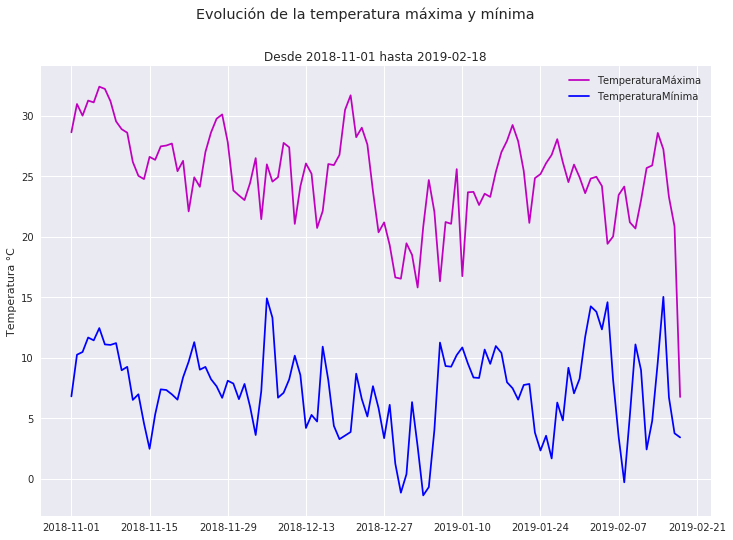

In [24]:
#Ahora se proceden a graficar las temperaturas máximas y mínimas a través del tiempo.
plt.plot_date(x=df7.Fecha, y=df7.TemperaturaMáxima, fmt= "m")
plt.plot_date(x=df7.Fecha, y=df7.TemperaturaMínima, fmt= "b-")
plt.legend(loc='best')
plt.suptitle("Evolución de la temperatura máxima y mínima")
plt.title("Desde 2018-11-01 hasta 2019-02-18")
plt.ylabel("Temperatura °C")
plt.grid(True)
plt.savefig('TMaxMinEvo', plt = 2000)
plt.show()

In [26]:
#Consigo la acumulación de horas frío desde el primer día.
UFC = []
temp = 0
for i in range (0, len(df7.UF24)):
    temp = df7["UF24"][i] + temp
    UFC.append(temp)
df8 = pd.DataFrame({"Fecha" : df7.Fecha, "AcumulaciónUF24" : UFC})
df8

,AcumulaciónUF24,Fecha
0,-0.5,2018-11-01
1,-9.5,2018-11-02
2,-18.5,2018-11-03
3,-30.0,2018-11-04
4,-38.0,2018-11-05
5,-49.5,2018-11-06
6,-58.0,2018-11-07
7,-67.5,2018-11-08
8,-76.0,2018-11-09
9,-81.0,2018-11-10


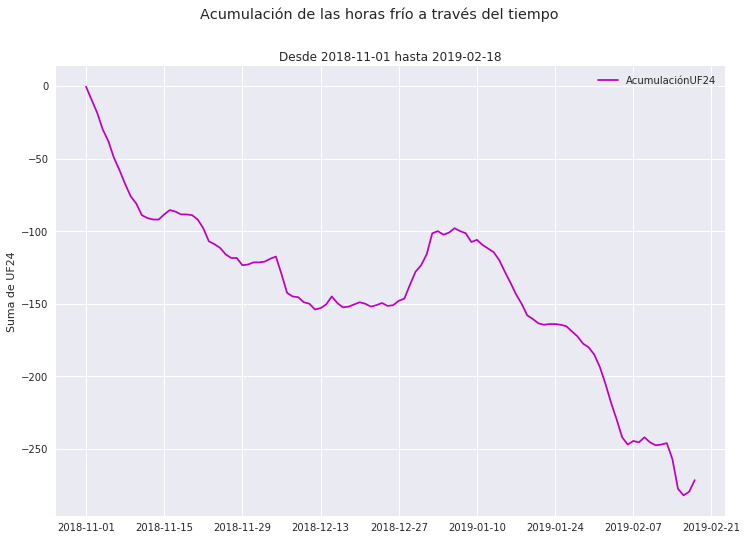

In [27]:
#Ahora se proceden a graficar la acumulación de horas frío a través del tiempo.
plt.plot_date(x=df7.Fecha, y=df8.AcumulaciónUF24, fmt= "m")
plt.legend(loc='best')
plt.suptitle("Acumulación de las horas frío a través del tiempo")
plt.title("Desde 2018-11-01 hasta 2019-02-18")
plt.ylabel("Suma de UF24")
plt.grid(True)
plt.savefig('AcuUF24', plt = 2000)
plt.show()